In [6]:
import pandas as pd
df = pd.read_csv("../3_Analysis_on_Extracted_Data_test_all_data/tracking_features_with_labels.csv")
df.head()

,tracking_id,num_points,bbox_area,point_density,avg_segment_distance,num_stops,cluster,pca1,pca2,predicted_label
0,96435,1092,0.037478,29136.266350,74.353047,1092,3,-0.837088,0.607072,RURAL
1,96436,1965,0.030543,64332.732343,68.475822,1965,2,0.925632,-0.461554,TOWN
2,96437,1631,0.029632,55040.207972,64.862972,1631,2,0.207247,-0.185117,TOWN
3,96438,2043,0.020103,101623.875093,63.076106,2043,2,0.956008,-0.879905,TOWN
4,96439,2266,0.073024,31030.518246,58.472769,2266,2,2.122557,0.517765,TOWN


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.tree import DecisionTreeClassifier
features = df.drop(columns=["tracking_id", "cluster", "predicted_label", "pca1", "pca2"])
labels = df["predicted_label"]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       RURAL       0.99      1.00      0.99       249
    SUBURBAN       0.99      0.97      0.98        99
        TOWN       1.00      1.00      1.00       605
       URBAN       1.00      1.00      1.00         5

    accuracy                           0.99       958
   macro avg       0.99      0.99      0.99       958
weighted avg       0.99      0.99      0.99       958

Confusion Matrix:
[[248   1   0   0]
 [  1  96   2   0]
 [  1   0 604   0]
 [  0   0   0   5]]


In [8]:
import joblib
joblib.dump(clf, "rf_area_classifier.pkl")


['rf_area_classifier.pkl']

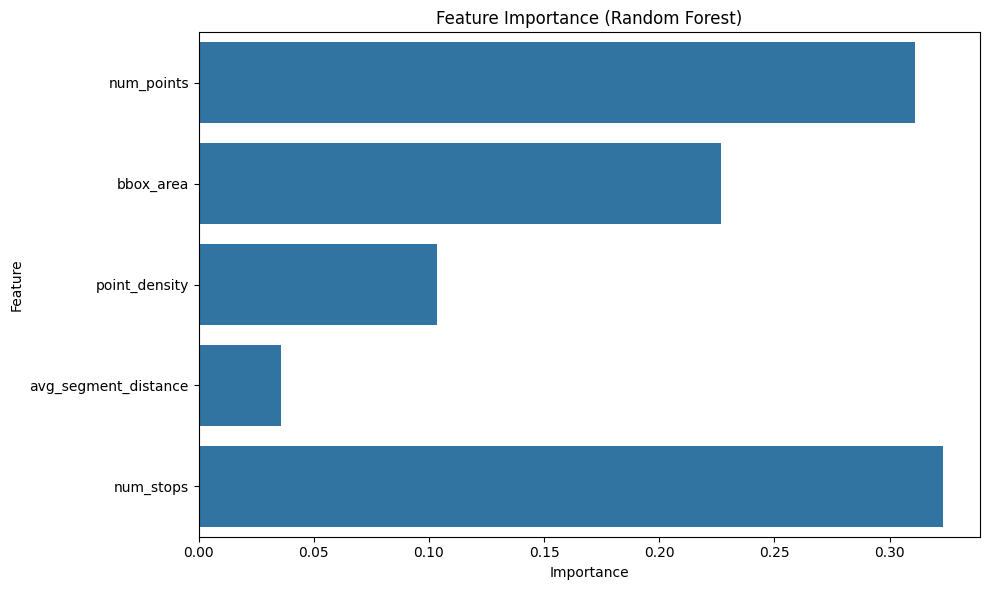

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

clf = joblib.load("rf_area_classifier.pkl")

importances = clf.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [10]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(clf, features, labels, cv=skf, scoring="accuracy")

print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Std Dev:", np.std(scores))


Cross-Validation Scores: [0.99791232 0.99373695 0.99582463 0.98956159 0.99791232 0.99791232
 0.98956159 1.         0.9916318  0.99790795]
Mean Accuracy: 0.9951961460853767
Std Dev: 0.0036233821911186865
